In [1]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.DataFrame()

In [3]:
df['x1'] = [1,2,3,4,5,6,6,7,9,9]
df['x2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,x1,x2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


In [5]:
import seaborn as sns

<Axes: xlabel='x1', ylabel='x2'>

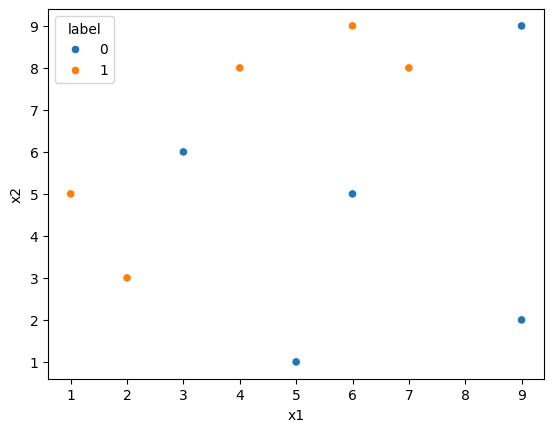

In [6]:
sns.scatterplot(x = df['x1'], y = df['x2'], hue=df['label'])

In [7]:
df['sample weight'] = 1/df.shape[0]

In [8]:
df

,x1,x2,label,sample weight
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [9]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(max_depth=1)

In [10]:
x = df.iloc[:,0:2]
y = df.iloc[:,2]
y

0    1
1    1
2    0
3    1
4    0
5    1
6    0
7    1
8    0
9    0
Name: label, dtype: int64

In [11]:
dt1.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

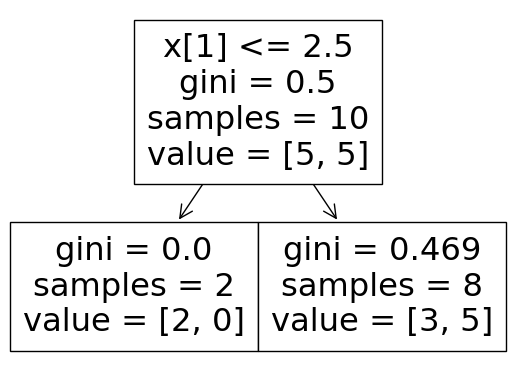

In [12]:
from sklearn.tree import plot_tree
plot_tree(dt1)

e:\Boosting\env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

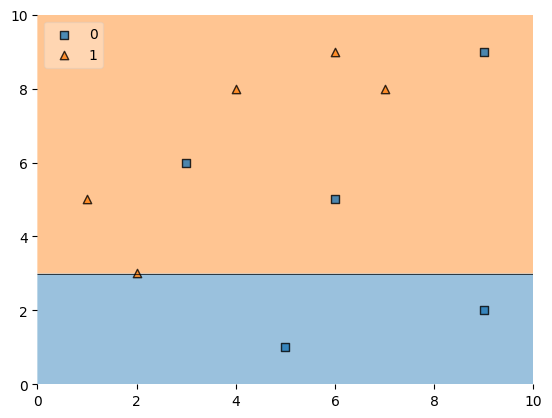

In [13]:
plot_decision_regions(np.array(x),np.array(y),clf=dt1,legend=2)

In [14]:
df['y_pred'] = dt1.predict(x)

In [15]:
df

,x1,x2,label,sample weight,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [16]:
# performance of the stump
def calculate_model_weight(error):
     return 0.5*np.log((1-error)/error)

In [17]:
alpha1 = calculate_model_weight(0.3)

In [18]:
alpha1

0.42364893019360184

In [19]:
# calculate the updated weight
def update_row_weights(row,alpha = 0.4236):
     if row['label'] == row['y_pred']:
          return row['sample weight']*np.exp(-alpha)
     else:
          return row['sample weight']*np.exp(alpha)

In [20]:
df['updated weights'] = df.apply(update_row_weights, axis = 1)

In [21]:
df

,x1,x2,label,sample weight,y_pred,updated weights
0,1,5,1,0.1,1,0.065469
1,2,3,1,0.1,1,0.065469
2,3,6,0,0.1,1,0.152745
3,4,8,1,0.1,1,0.065469
4,5,1,0,0.1,0,0.065469
5,6,9,1,0.1,1,0.065469
6,6,5,0,0.1,1,0.152745
7,7,8,1,0.1,1,0.065469
8,9,9,0,0.1,1,0.152745
9,9,2,0,0.1,0,0.065469


In [22]:
sum_of_updated_weights = sum(df['updated weights'])


In [23]:
df['normalized weight'] = df['updated weights']/sum_of_updated_weights

In [24]:
df

,x1,x2,label,sample weight,y_pred,updated weights,normalized weight
0,1,5,1,0.1,1,0.065469,0.071432
1,2,3,1,0.1,1,0.065469,0.071432
2,3,6,0,0.1,1,0.152745,0.166659
3,4,8,1,0.1,1,0.065469,0.071432
4,5,1,0,0.1,0,0.065469,0.071432
5,6,9,1,0.1,1,0.065469,0.071432
6,6,5,0,0.1,1,0.152745,0.166659
7,7,8,1,0.1,1,0.065469,0.071432
8,9,9,0,0.1,1,0.152745,0.166659
9,9,2,0,0.1,0,0.065469,0.071432


In [25]:
df['cumsum_upper'] = np.cumsum(df['normalized weight'])
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized weight']

In [26]:
df

,x1,x2,label,sample weight,y_pred,updated weights,normalized weight,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065469,0.071432,0.071432,0.000000
1,2,3,1,0.1,1,0.065469,0.071432,0.142864,0.071432
2,3,6,0,0.1,1,0.152745,0.166659,0.309523,0.142864
3,4,8,1,0.1,1,0.065469,0.071432,0.380955,0.309523
4,5,1,0,0.1,0,0.065469,0.071432,0.452387,0.380955
5,6,9,1,0.1,1,0.065469,0.071432,0.523819,0.452387
6,6,5,0,0.1,1,0.152745,0.166659,0.690477,0.523819
7,7,8,1,0.1,1,0.065469,0.071432,0.761909,0.690477
8,9,9,0,0.1,1,0.152745,0.166659,0.928568,0.761909
9,9,2,0,0.1,0,0.065469,0.071432,1.000000,0.928568


In [27]:
# random sampling for my next decision stump
indexes = []
for i in range(df.shape[0]):
     a = np.random.random()
     for index,row in df.iterrows():
          if row['cumsum_upper'] > a and a > row['cumsum_lower']:
               indexes.append(index)
               
print(indexes)

[8, 1, 6, 4, 3, 1, 6, 2, 1, 8]


In [28]:
df1 = df.iloc[indexes][['x1','x2','label','sample weight']]

In [29]:
df1

,x1,x2,label,sample weight
8,9,9,0,0.1
1,2,3,1,0.1
6,6,5,0,0.1
4,5,1,0,0.1
3,4,8,1,0.1
1,2,3,1,0.1
6,6,5,0,0.1
2,3,6,0,0.1
1,2,3,1,0.1
8,9,9,0,0.1


In [30]:
x1 = df1.iloc[:,0:2]
y1 = df1.iloc[:,2]

In [31]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [32]:
dt2.fit(x1,y1)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 4.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.25, 0.25, 'gini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]')]

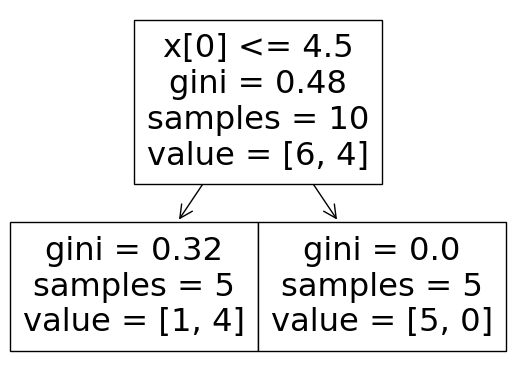

In [33]:
plot_tree(dt2)

In [34]:
df1['y_pred'] = dt2.predict(x)

In [35]:
df1

,x1,x2,label,sample weight,y_pred
8,9,9,0,0.1,1
1,2,3,1,0.1,1
6,6,5,0,0.1,1
4,5,1,0,0.1,1
3,4,8,1,0.1,0
1,2,3,1,0.1,0
6,6,5,0,0.1,0
2,3,6,0,0.1,0
1,2,3,1,0.1,0
8,9,9,0,0.1,0


In [36]:
alpha2 = calculate_model_weight(0.2)
alpha2

0.6931471805599453

In [37]:
def update_row_weights(row,alpha = 0.6931):
     if row['label'] == row['y_pred']:
          return row['sample weight']*np.exp(-alpha)
     else:
          return row['sample weight']*np.exp(alpha)

In [38]:
df1['updated weights'] = df1.apply(update_row_weights,axis=1)

In [39]:
df1

,x1,x2,label,sample weight,y_pred,updated weights
8,9,9,0,0.1,1,0.199991
1,2,3,1,0.1,1,0.050002
6,6,5,0,0.1,1,0.199991
4,5,1,0,0.1,1,0.199991
3,4,8,1,0.1,0,0.199991
1,2,3,1,0.1,0,0.199991
6,6,5,0,0.1,0,0.050002
2,3,6,0,0.1,0,0.050002
1,2,3,1,0.1,0,0.199991
8,9,9,0,0.1,0,0.050002


In [40]:
sum_of_updated_weights2 = df1['updated weights'].sum()

In [41]:
df1['normalized weights'] = df1['updated weights']/sum_of_updated_weights2

In [42]:
df1

,x1,x2,label,sample weight,y_pred,updated weights,normalized weights
8,9,9,0,0.1,1,0.199991,0.142855
1,2,3,1,0.1,1,0.050002,0.035717
6,6,5,0,0.1,1,0.199991,0.142855
4,5,1,0,0.1,1,0.199991,0.142855
3,4,8,1,0.1,0,0.199991,0.142855
1,2,3,1,0.1,0,0.199991,0.142855
6,6,5,0,0.1,0,0.050002,0.035717
2,3,6,0,0.1,0,0.050002,0.035717
1,2,3,1,0.1,0,0.199991,0.142855
8,9,9,0,0.1,0,0.050002,0.035717


In [43]:
df1['cumsum_upper'] = np.cumsum(df1['normalized weights'])
df1['cumsum_lower'] = df1['cumsum_upper'] - df1['normalized weights']

In [44]:
df1

,x1,x2,label,sample weight,y_pred,updated weights,normalized weights,cumsum_upper,cumsum_lower
8,9,9,0,0.1,1,0.199991,0.142855,0.142855,0.000000
1,2,3,1,0.1,1,0.050002,0.035717,0.178572,0.142855
6,6,5,0,0.1,1,0.199991,0.142855,0.321428,0.178572
4,5,1,0,0.1,1,0.199991,0.142855,0.464283,0.321428
3,4,8,1,0.1,0,0.199991,0.142855,0.607138,0.464283
1,2,3,1,0.1,0,0.199991,0.142855,0.749993,0.607138
6,6,5,0,0.1,0,0.050002,0.035717,0.785710,0.749993
2,3,6,0,0.1,0,0.050002,0.035717,0.821428,0.785710
1,2,3,1,0.1,0,0.199991,0.142855,0.964283,0.821428
8,9,9,0,0.1,0,0.050002,0.035717,1.000000,0.964283


In [45]:
indexes1 = []
for i in range(df1.shape[0]):
     a = np.random.random()
     for index,row in df1.iterrows():
          if row['cumsum_upper'] > a and a > row['cumsum_lower']:
               indexes1.append(index)
               
print(indexes1)

[6, 3, 4, 3, 2, 8, 8, 1, 6, 8]


In [46]:
df2 = df1.iloc[indexes1][['x1','x2','label','sample weight']]

In [47]:
df2

,x1,x2,label,sample weight
6,6,5,0,0.1
4,5,1,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
6,6,5,0,0.1
1,2,3,1,0.1
1,2,3,1,0.1
1,2,3,1,0.1
6,6,5,0,0.1
1,2,3,1,0.1


In [ ]:
# final prediction
# final_prediction = (alpha1*dt1 + alpha2*dt2)

In [48]:
print(alpha1, alpha2)

0.42364893019360184 0.6931471805599453


In [49]:
query = np.array([[6,4]])

In [50]:
dt1.predict(query)

e:\Boosting\env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [51]:
dt2.predict(query)

e:\Boosting\env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [53]:
final_prediction = alpha1*1 + alpha2*-1

In [54]:
np.sign(final_prediction)

-1.0

# final answer is 0 because -1 means 0 and 1 means 1